In [331]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract


In [332]:
from src.processing import *
from PIL import*

# Teste 1: Leitor da Biblia


## Processamento

#### Imagem Original

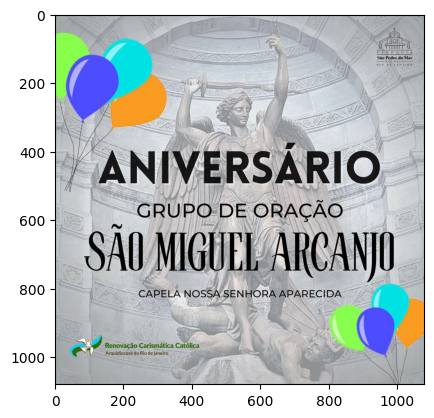

In [333]:
dir="data\images\ArteIgreja.jpg"
img = lerImagem(dir)
mostrar(img)

### Imagem pré processada

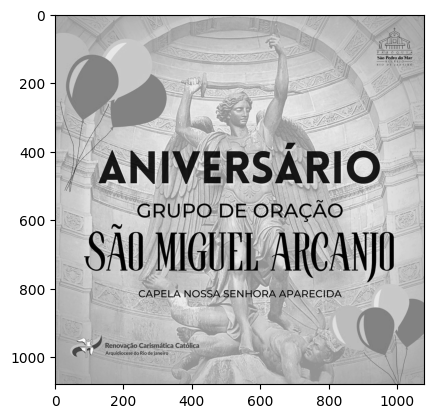

In [334]:
imgCinza = escalaCinza(img)
mostrar(imgCinza)

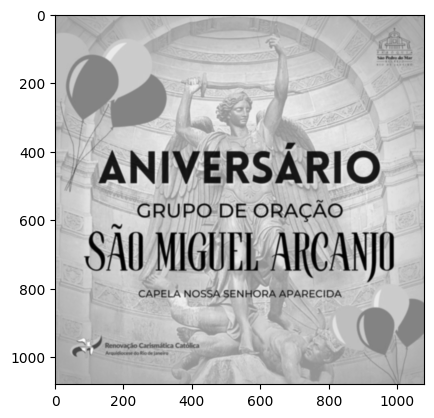

In [335]:

gauss = gaussiano(imgCinza, 7, 7)

mostrar(gauss)

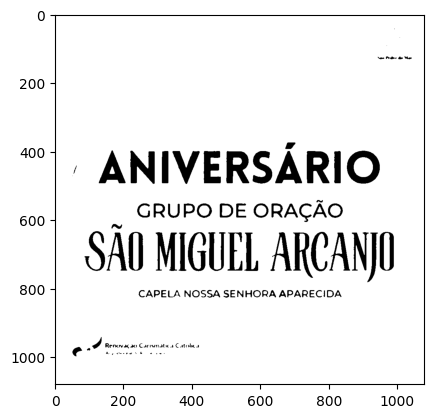

In [336]:
imgTrasholding = thresholding(gauss)
#thres = gaussian_thresholding(grey)

mostrar(imgTrasholding)

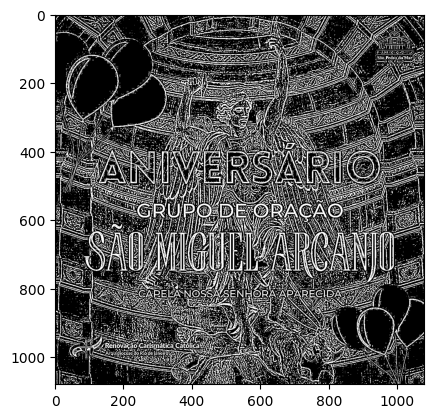

In [337]:
imgTrasholdingGauss = thresholdingGaussiano(imgCinza)
#thres = gaussian_thresholding(grey)

mostrar(imgTrasholdingGauss)

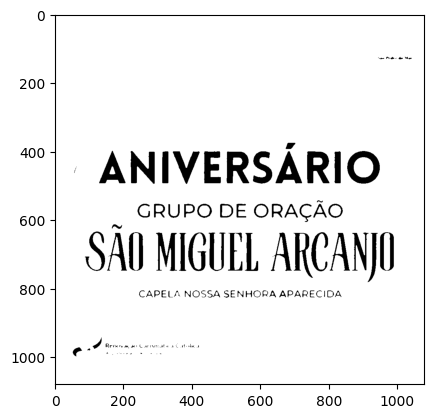

In [338]:
imgProcessada = imgTrasholding
imgProcessada = dilatarImg(imgProcessada, iterations=1)

mostrar(imgProcessada)

## Separar Caracteres

### Segmentação Processada

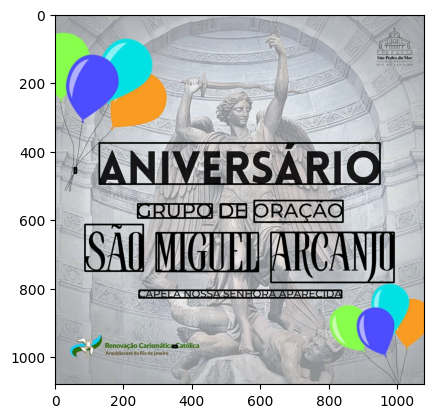

In [339]:
mostrar(palavraBlocoImg(imgProcessada.copy(), (0, 2, 0), img=img.copy()))

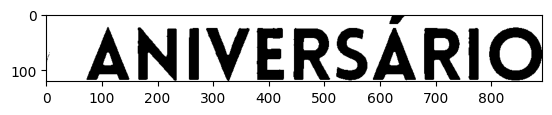

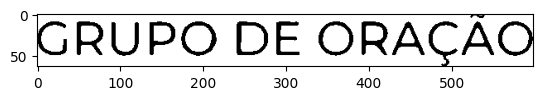

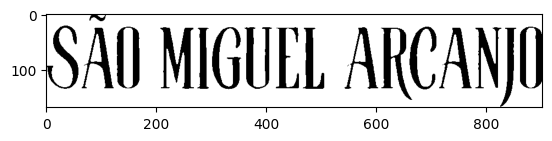

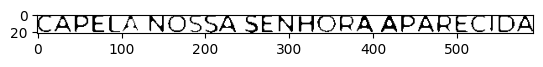

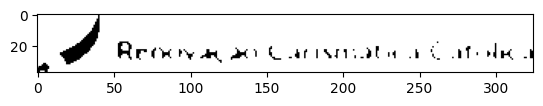

['— ANIVERSÁRIO\n', 'GRUPO DE ORAÇÃO\n', 'SÃO MIGUEL ARCANJO\n', 'CAPELA NOSSA SENHORA APARECIDA\n', '_/ Reoovação Carismiata a £oatolxo\n']


In [340]:
dadosImg= pegarDados(imgProcessada)
segmento = list()
segmentoTxt = list()

for i in range(len(dadosImg['text'])):
    (x, y, w, h) = (dadosImg['left'][i], dadosImg['top'][i], dadosImg['width'][i], dadosImg['height'][i])
    corteImg = imgProcessada[y:y+h, x:x+w]
    if dadosImg['level'][i] == 2:
        segmento.append(corteImg)
        #print(img_dict['text'][i])
        segmentoTemp= ocr(corteImg)
        j=0
        mostrar(corteImg)
        try:
            while (segmentoTemp=='' and j<=12):
                corteImg=imgProcessada[y-j:y+h+j,x-j:x+w+j]
                segmentoTemp= ocr(corteImg)
                j=j+2
        except (SystemError,AttributeError):
            pass 
       
        segmentoTxt.append(segmentoTemp)
        # print(segment_txt)
print(segmentoTxt)
# segmentoTxt.pop()

### Segmentação Original

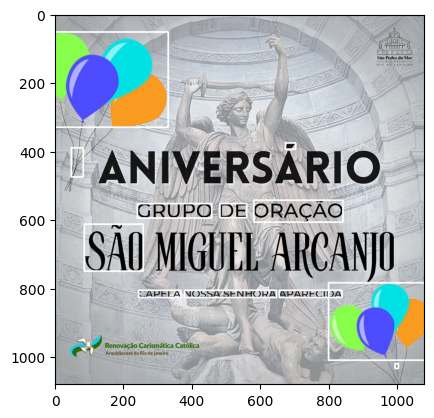

In [341]:
mostrar(palavraBlocoImg(img.copy(), (255,255,255)))

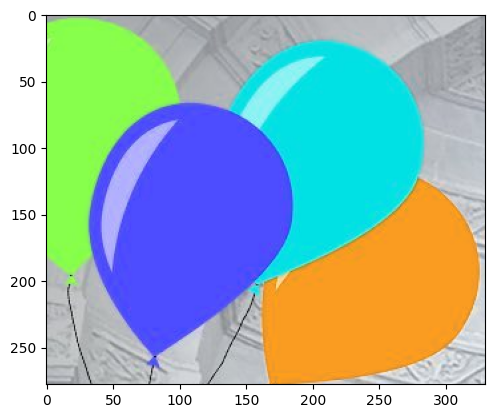

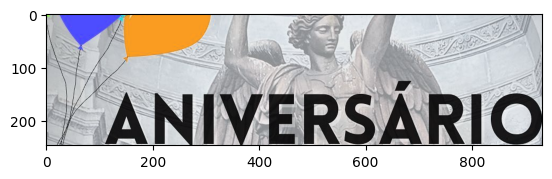

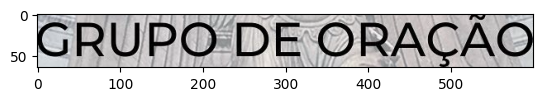

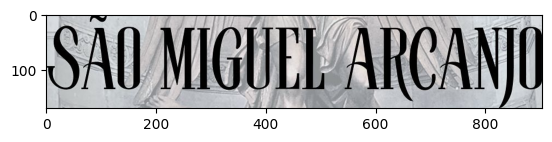

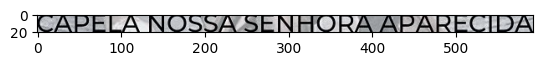

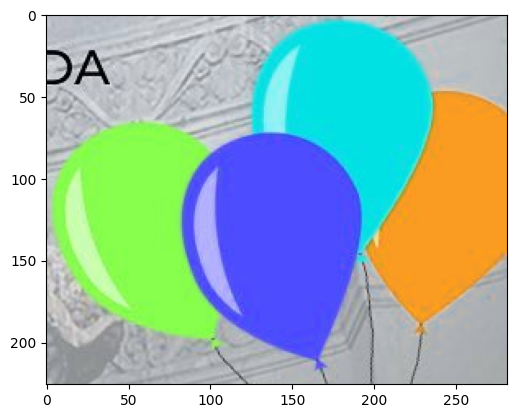

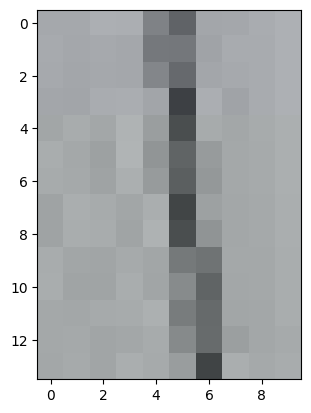

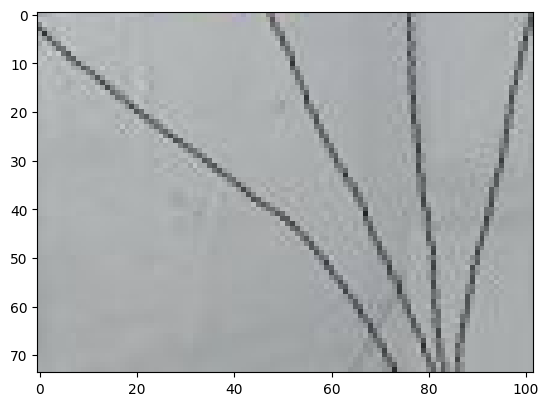

['', "&X/ : '\n) ANIVERSÁRIO\n", 'GRUPO DE ORAÇÃO\n', 'SAO MIGUEL ARCANTO\n', 'CAPELA NOSSA SENHORA APARECIDA\n', '', '', '']


In [342]:
dadosImgOriginal= pegarDados(img)
segmentoOriginal = list()
segmentoTxtOriginal = list()

for i in range(len(dadosImgOriginal['text'])):
    (x, y, w, h) = (dadosImgOriginal['left'][i], dadosImgOriginal['top'][i], dadosImgOriginal['width'][i], dadosImgOriginal['height'][i])
    corteImg = img[y:y+h, x:x+w]
    if dadosImgOriginal['level'][i] == 2:
        segmentoOriginal.append(corteImg)
        segmentoTemp= ocr(corteImg)
        j=0
        mostrar(corteImg)
        try:
            while (segmentoTemp=='' and j<=12):
                corteImg=img[y-j:y+h+j,x-j:x+w+j]
                segmentoTemp= ocr(corteImg)
                j=j+2
        except (SystemError,AttributeError,ValueError)as e:
            pass 
        #print(img_dict['text'][i])
        segmentoTxtOriginal.append(segmentoTemp)
        # print(segment_txt)
print(segmentoTxtOriginal)

## OCR

In [343]:
textImgOriginal = ocr(img)
textImgProcessada = ocr(imgProcessada)
segmentoTxt = ' '.join(segmentoTxt)
segmentoTxtOriginal = ' '.join(segmentoTxtOriginal)



In [344]:
print(textImgOriginal)

rXÍ/ »
/ ANIVERSÁRIO

GRUPO DE ORAÇÃO

SÃO MIGUEL/ARCANJO

CAPELA NOSSASENHORA APARECIDA

si NB /
SMN WW |
A



In [345]:
print(textImgProcessada)

— ANIVERSÁRIO

GRUPO DE ORAÇÃO

SÃO MIGUEL ARCANJO

AAAAAAAAAAAAAAAAAAAAAAAAAAA

_/ Rroovação Carisata a Catolko



In [346]:
print(segmentoTxt)

— ANIVERSÁRIO
 GRUPO DE ORAÇÃO
 SÃO MIGUEL ARCANJO
 CAPELA NOSSA SENHORA APARECIDA
 _/ Reoovação Carismiata a £oatolxo



In [347]:
print(segmentoTxtOriginal)

 &X/ : '
) ANIVERSÁRIO
 GRUPO DE ORAÇÃO
 SAO MIGUEL ARCANTO
 CAPELA NOSSA SENHORA APARECIDA
   


## Pos-Processamento

### Texto imagem Original


In [348]:
textOriginalPos = removerEspaçoDuplo(textImgOriginal)
textOriginalPos=removerNumeros(textOriginalPos)
textOriginalPos = removerLetraSolo(textOriginalPos, keep_e=True, keep_a=True)
print(textOriginalPos)

rXÍ/ » / ANIVERSÁRIO GRUPO DE ORAÇÃO SÃO MIGUEL/ARCANJO CAPELA NOSSASENHORA APARECIDA si NB / SMN WW | A 


### Texto da imagem Original Segmentada

In [349]:
segmentoTxtOriginalPos = removerQuebra(segmentoTxtOriginal, add_space=True)
segmentoTxtOriginalPos = removerNumeros(segmentoTxtOriginalPos)
segmentoTxtOriginalPos = removerEspaçoDuplo(segmentoTxtOriginalPos)
segmentoTxtOriginalPos = removerLetraSolo(segmentoTxtOriginalPos)
print(segmentoTxtOriginalPos)

 &/ : ' ) ANIVERSÁRIO GRUPO DE ORAÇÃO SAO MIGUEL ARCANTO CAPELA NOSSA SENHORA APARECIDA 


### Texto da Imgem Processada


In [350]:
textImgProcessadaPos = removerEspaçoDuplo(textImgProcessada)
textImgProcessadaPos=removerNumeros(textImgProcessadaPos)
textImgProcessadaPos = removerLetraSolo(textImgProcessadaPos, keep_e=True, keep_a=True)
print(textImgProcessadaPos)

— ANIVERSÁRIO GRUPO DE ORAÇÃO SÃO MIGUEL ARCANJO AAAAAAAAAAAAAAAAAAAAAAAAAAA / Rroovação Carisata a Catolko 


### Texto da imagem Processada e Segmentada

In [351]:
segmentoTxtPos = removerEspaçoDuplo(segmentoTxt)
segmentoTxtPos = removerNumeros(segmentoTxtPos)
segmentoTxtPos = removerLetraSolo(segmentoTxtPos)
print(segmentoTxtPos)

— ANIVERSÁRIO GRUPO DE ORAÇÃO SÃO MIGUEL ARCANJO CAPELA NOSSA SENHORA APARECIDA / Reoovação Carismiata £oatolxo 
